# 1.导入相关库

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import jieba
from wordcloud import WordCloud
from imageio import imread
# 忽略警告
import warnings
warnings.filterwarnings("ignore")

# 中文字体设置
plt.rcParams["font.family"] = "SimHei"
# 字体大小设置
plt.rcParams["font.size"] = 16
# 字体风格设置
plt.rcParams["font.style"] = "italic"

# 2.读取数据

In [76]:
df = pd.read_csv("final_all_comment.csv",index_col=0)
df.head(10)

,评论时间,评论星级,评论内容
0,2020-12-01 21:04:12,4,这才第一集，嫪毐的一个肾就没了，可还行？赵姬表示很亏[裂开]
1,2020-12-01 21:00:00,3,比大秦帝国，差点儿意思。
2,2020-12-01 20:43:49,5,从《裂变》一集不落的追到现在，也是数年的老粉了，在此期间，思想几多变化，对于大秦帝国系列要传...
3,2020-12-01 20:59:47,5,好看，一个段奕宏我就入戏了
4,2020-12-02 23:21:44,2,剧组合适吗 当我傻 不知道嬴政多少岁登基吗 窒息 张鲁一演少年嬴政是穷的请不起小演员吗
5,2020-12-01 20:36:07,5,赳赳老秦，共赴国难！
6,2020-12-01 21:13:28,1,因一星被很多第四部粉丝豆邮恶意攻击。别人要接受你们的分数，否则就是异教徒。磨皮发白的滤镜和军...
7,2020-12-03 22:58:50,3,张鲁一对着朱珠喊“母亲”，我后背发凉。
8,2020-12-02 21:19:00,4,道服化好用心，演员除开赵姬都很给力，就不明白一点，张鲁一长相气质完全没有嬴政的feel，目前...
9,2020-12-01 20:49:32,4,全是有演技的，好看


# 3.剔除重复值：如果评论时间和评论内容一摸一样，我们认为是重复值

In [23]:
print("删除之前的记录数：",df.shape)
df.drop_duplicates(subset=['评论时间','评论内容'],inplace=True,keep='first')
print("删除之前的记录数：",df.shape)

删除之前的记录数： (500, 3)
删除之前的记录数： (493, 3)


# 4.评论时间处理

In [29]:
df["评论天数"] = df["评论时间"].str[8:-9].astype(int)
df["小时"] = df["评论时间"].str[11:-6].astype(int)
df

,评论时间,评论星级,评论内容,评论天数,小时
0,2020-12-01 21:04:12,4,这才第一集，嫪毐的一个肾就没了，可还行？赵姬表示很亏[裂开],1,21
1,2020-12-01 21:00:00,3,比大秦帝国，差点儿意思。,1,21
2,2020-12-01 20:43:49,5,从《裂变》一集不落的追到现在，也是数年的老粉了，在此期间，思想几多变化，对于大秦帝国系列要传...,1,20
3,2020-12-01 20:59:47,5,好看，一个段奕宏我就入戏了,1,20
4,2020-12-02 23:21:44,2,剧组合适吗 当我傻 不知道嬴政多少岁登基吗 窒息 张鲁一演少年嬴政是穷的请不起小演员吗,2,23
...,...,...,...,...,...
15,2020-12-15 01:26:57,1,这个叫珠珠的肯定不简单，接了两档大IP大众翘首以盼的剧，说明……都烂掉了说明………，而且大秦...,15,1
16,2020-12-10 22:09:22,2,都34集了，秦王还没亲政，这不是最后一部了吗？张鲁一这部剧里演得好一般，说好的千古一帝，到现...,10,22
17,2020-12-13 22:40:31,1,本剧是对始皇帝的侮辱,13,22
18,2020-12-08 12:13:42,1,不管剧情怎么样，演员应该合适的年纪拍合适的剧，13岁和19岁的嬴政真的不长张鲁一这样,8,12


# 5.评论星级说明

In [30]:
对于星级这一块，我们在做数据爬取的时候，已经做了数据处理。原始数据10代表这里的1星，20代表2星......
所有的星级数据，在爬虫时候，都除以10！

SyntaxError: invalid character in identifier (<ipython-input-30-0356e7100cc2>, line 1)

# 6.评论内容机械压缩去重

In [31]:
def func(st):
    for i in range(1,int(len(st)/2)+1):
        for j in range(len(st)):
            if st[j:j+i] == st[j+i:j+2*i]:
                k = j + i
                while st[k:k+i] == st[k+i:k+2*i] and k<len(st):   
                    k = k + i
                st = st[:j] + st[k:]    
    return st
    
st = "我爱你我爱你我爱你好你好你好哈哈哈哈哈"
func(st)

'我爱你好哈'

### 参照上述函数，我们对本文的本文进行机械压缩去重

In [32]:
def func(st):
    for i in range(1,int(len(st)/2)+1):
        for j in range(len(st)):
            if st[j:j+i] == st[j+i:j+2*i]:
                k = j + i
                while st[k:k+i] == st[k+i:k+2*i] and k<len(st):   
                    k = k + i
                st = st[:j] + st[k:]    
    return st

df["评论内容"] = df["评论内容"].apply(func)
df.head()

,评论时间,评论星级,评论内容,评论天数,小时
0,2020-12-01 21:04:12,4,这才第一集，嫪毐的一个肾就没了，可还行？赵姬表示很亏[裂开],1,21
1,2020-12-01 21:00:00,3,比大秦帝国，差点儿意思。,1,21
2,2020-12-01 20:43:49,5,从《裂变》一集不落的追到现在，也是数年的老粉了，在此期间，思想几多变化，对于大秦帝国系列要传...,1,20
3,2020-12-01 20:59:47,5,好看，一个段奕宏我就入戏了,1,20
4,2020-12-02 23:21:44,2,剧组合适吗 当我傻 不知道嬴政多少岁登基吗 窒息 张鲁一演少年嬴政是穷的请不起小演员吗,2,23


# 1）评论数随时间的变化趋势

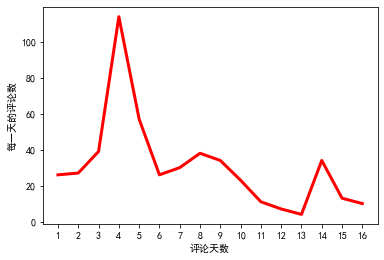

In [52]:
comment_day = df.groupby("评论天数")["评论天数"].count()
comment_day.plot(color="r",linewidth=3)
plt.ylabel("每一天的评论数")
plt.xticks(range(1,17),comment_day.index)
plt.savefig("评论数随时间的变化趋势",dpi=300)

# 2）二十四小时内的评论数的变化趋势

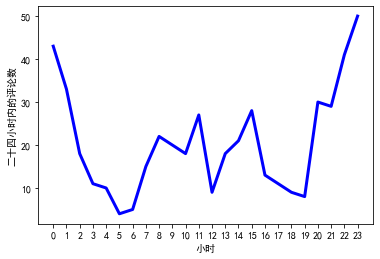

In [55]:
comment_hour = df.groupby("小时")["小时"].count()
comment_hour.plot(color="blue",linewidth=3)
plt.ylabel("二十四小时内的评论数")
plt.xticks(range(0,24),comment_hour.index)
plt.savefig("二十四小时内的评论数的变化趋势",dpi=300)

# 3）星级评分的饼图

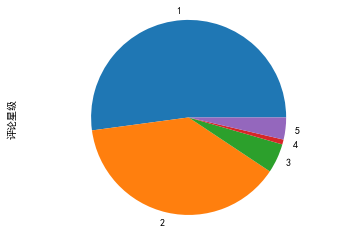

In [63]:
comment_rate = df.groupby("评论星级")["评论星级"].count()
percentage = comment_rate / df["评论星级"].shape[0]
percentage.plot(kind="pie")
plt.axis("equal")
plt.savefig("星级评分的饼图",dpi=300)

# 4）大家主要都在评论一些啥

In [67]:
import jieba
from wordcloud import WordCloud
from imageio import imread

### 制作词云图按照“如下步骤”就不会有问题

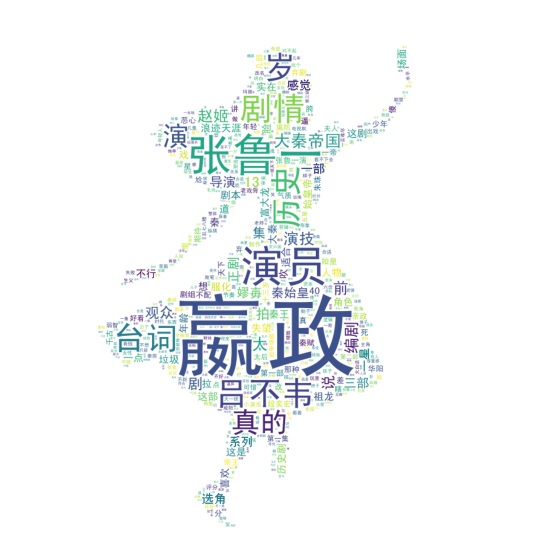

In [75]:
# 1）对评论内容进行分词操作
jieba.add_word("大秦帝国")
df["切分后评论"] = df["评论内容"].apply(jieba.lcut)

# 2）读取停用词，并去除停用词
with open("stopword.txt","r",encoding="gbk") as f:
    stop = f.read()  # 返回的是一个字符串
stop = stop.split()  # 这里得到的是一个列表.split()会将空格，\n，\t进行切分，因此我们可以将这些加到停用词当中
stop = stop + [" ","\n","\t"]
df_after = df["切分后评论"].apply(lambda x: [i for i in x if i not in stop])

# 3）词频统计
all_words = []
for i in df_after:
    all_words.extend(i)

word_count = pd.Series(all_words).value_counts()

# 4）绘制词云图
# Ⅰ读取背景图片
back_picture = imread("alice_color.png")
# Ⅱ 设置词云参数
wc = WordCloud(font_path="simhei.ttf",
               background_color="white",
               max_words=2000,
               mask=back_picture,
               max_font_size=200,
               random_state=42
              )
wc2 = wc.fit_words(word_count)
# Ⅲ 绘制词云图
plt.figure(figsize=(20,10))
plt.imshow(wc2)
plt.axis("off")
plt.show()
wc.to_file("ciyun.png")